# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
# Gets the number of rows and columns
df.shape

(1898, 9)

#### Observations:
There are 9 Columns and 1898 Rows.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 9 Columns. Out of which we have 4 Columns that hold Integer values and 1 that holds Floats. There are 4 Columns that hold String or Object Values.

There are 1898 Rows available. 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values within the following data. The Table that is displayed is showing the counts of all of the null values if there are available in the columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Write your code here
df.describe(include = "all") # Helps us get a statistical summary. 
# Include = "all" allows us to view the categorical variables as well within the table.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:
Average Food Preparation Time: 27.37 minutes

Minimum Food Preparation Time: 20 minutes

Maximum Food Preparation Time: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Write the code here
# using .unique() to understand the unique values that are available.
df["rating"].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [8]:
# Going through the Rating Column via For Loop and counting the number of ratings that have been given as Not Given.
not_rated = 0
for i in df['rating']:
    if i == 'Not given':
        not_rated += 1
    else:
        continue
print('There are ' + str(not_rated) + " orders that were not rated!")

There are 736 orders that were not rated!


#### Observations:
From the code we can see that out of the 1898 Orders, there are 736 orders that are not rated and have been given as "Not given" in the Table.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
df["order_id"].nunique() #Number of Unique Order IDs

1898

#### Observation
This lets us know that all of the order ids are unique

In [10]:
df['customer_id'].nunique() #Number of Unique Customer IDs

1200

#### Observation
This lets us know that there are 1200 unique customers

In [11]:
df['restaurant_name'].nunique() #Number of Unique Restaurant Names

178

#### Observation
This lets us know that there are 178 restaurants

In [12]:
df['cuisine_type'].nunique() #Number of Unique Cuisine Types

14

#### Observation
This lets us know that there are 14 different cuisine types available.

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

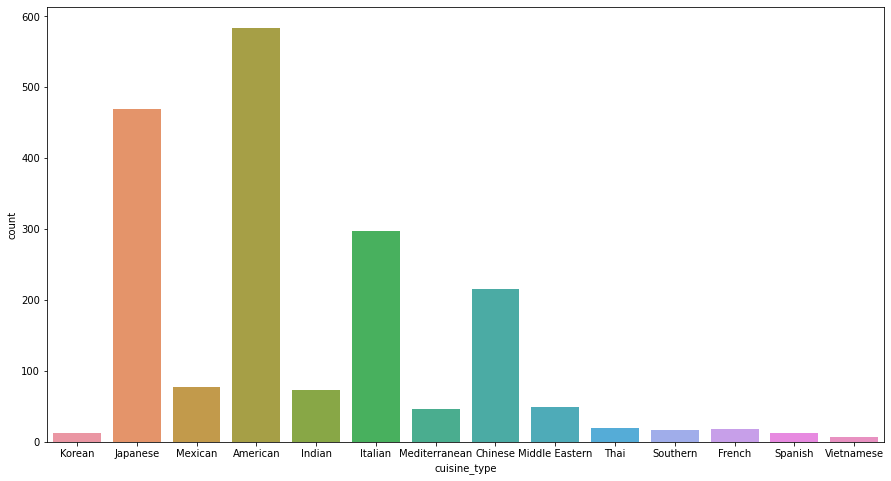

In [13]:
# Write the code here
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'cuisine_type') #Allows us to count the number of orders are made per cuisine

#### Observation
From this countplot we can see that American Cuisine and Japanese Cuisine are among the most popular.

<Figure size 720x576 with 0 Axes>

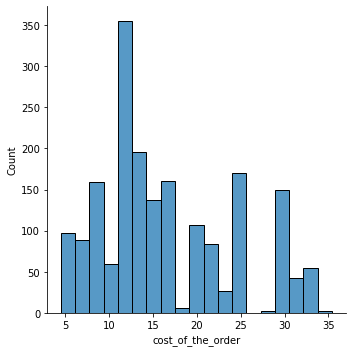

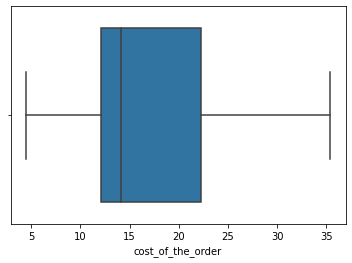

In [14]:
plt.figure(figsize = (10,8))
sns.displot(data = df, x = "cost_of_the_order")
plt.show()
sns.boxplot(data = df, x = 'cost_of_the_order')
plt.show()

#### Observation
We can tell that there are more orders around the 10 - 15 cost than there are at higher costs. Both the boxplot and the histogram plot are left skewed

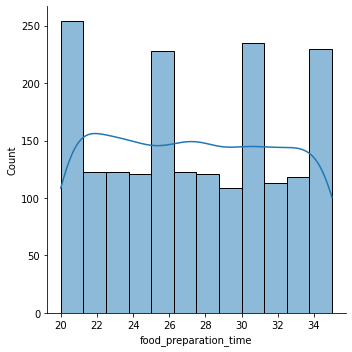

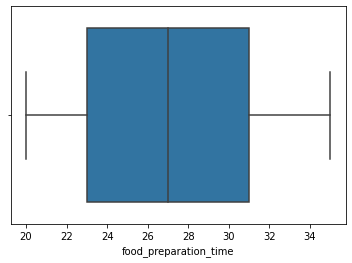

In [15]:
sns.displot(data = df, x = 'food_preparation_time', kde = True)
plt.show()
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show()

#### Observation
Food preparation Time can take between 20 to 35 minutes to prepare, and from the boxplot we can see that there is almost no skew. 

In [16]:
df["day_of_the_week"].nunique() #number of unique values in day_of_the_week

2

Text(0.5, 1.0, 'Orders by Day of the Week')

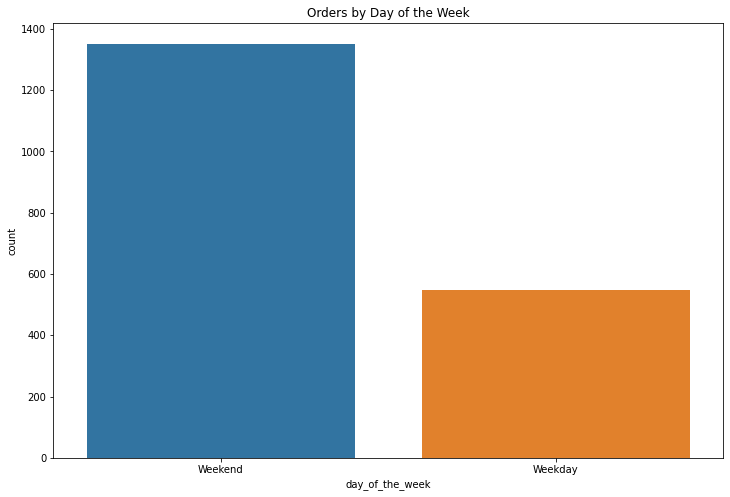

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'day_of_the_week') #Allows us to count the number of orders per day of the week
plt.title("Orders by Day of the Week")

In [18]:
df['rating'].unique() #Getting the Unique Values for the Rating Column

array(['Not given', '5', '3', '4'], dtype=object)

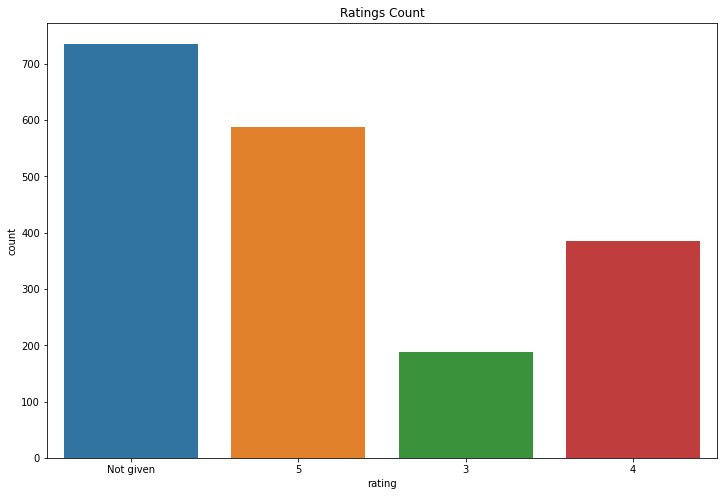

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'rating') #Total number of ratings that have been given
plt.title("Ratings Count")
plt.show()

#### Observation
We can see that there are more orders that are placed on the Weekend than they are on the weekday

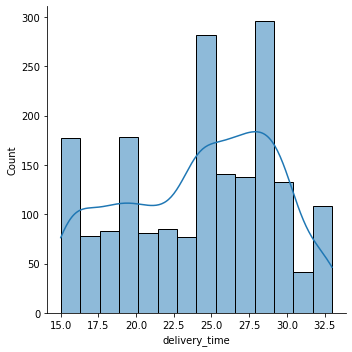

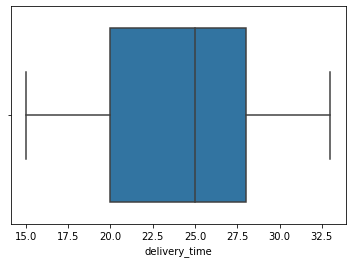

In [20]:
sns.displot(data = df, x = 'delivery_time', kde = True)
plt.show()
sns.boxplot(data = df, x = 'delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Write the code here
#Top 5 restaurants using the groupby() and size() function to get the total number of orders by restaurant name
top_5_restaurant = df.groupby("restaurant_name").size().reset_index(name = "count").sort_values(by = 'count', ascending = False).head()
top_5_restaurant

,restaurant_name,count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


Text(0.5, 1.0, 'Top 5 restaurants by count')

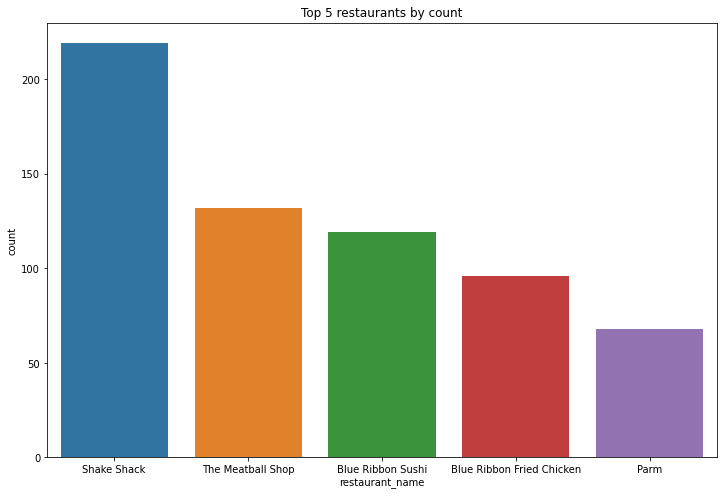

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x='restaurant_name', y='count', data=top_5_restaurant)
plt.title('Top 5 restaurants by count')

#### Observations:
From the barplot and the data table we can see the following restaurants are top 5 based on the number of orders that have been received by them.
1. Shake Shack = 219
2. The Meatball Shop = 132
3. Blue Ribbon Sushi = 119
4. Blue Ribbon Fried Chicken = 96
5. Parm = 68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
# Write the code here
# grouping by days of the week and by cuisine type
cuisine_group = df.groupby(["cuisine_type", "day_of_the_week"]).size().reset_index(name = "count").sort_values(by = "count", ascending = False)

#filtering for only the cuisines on the weekend
cuisine_group[cuisine_group["day_of_the_week"] == "Weekend"].head()

,cuisine_type,day_of_the_week,count
1,American,Weekend,415
11,Japanese,Weekend,335
9,Italian,Weekend,207
3,Chinese,Weekend,163
17,Mexican,Weekend,53


#### Observations:
American Cuisine is the most popular on the Weekends. Out of 1351 weekend orders 415 orders are from the American Cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Write the code here
more_than_20 = 0
less_than_20 = 0
for i in df["cost_of_the_order"]:
    if i > 20:
        more_than_20 += 1
    else:
        less_than_20 += 1

print("The following percentage of orders that costed more than 20 is: " + 
      str(round((more_than_20*100)/(more_than_20 + less_than_20),2)) + "%")

The following percentage of orders that costed more than 20 is: 29.24%


#### Observations:
Approximately 29.24 percent of all orders costed more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# Write the code here
# We are able to get the average delivery time by using the .mean() function
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The mean delivery time is approximately 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Write the code here
customerid_count = df.groupby("customer_id").size().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
top_3 = customerid_count.head(3)
top_3

,customer_id,count
116,52832,13
84,47440,10
333,83287,9


#### Observations:
The Customer IDs that have placed the most orders are:
1. 52832 = 13 orders
2. 47440 = 10 orders
3. 83287 = 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [28]:
# Write the code here
#Creating a correlation matrix to see if there is any correlation between items
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
corr_matrix

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


<AxesSubplot:>

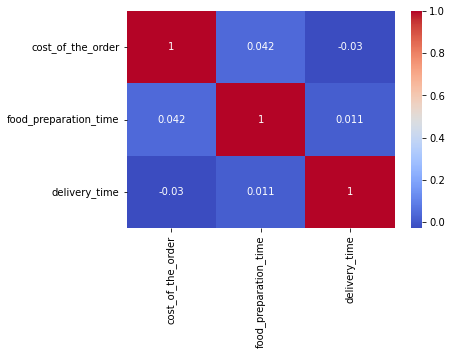

In [29]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

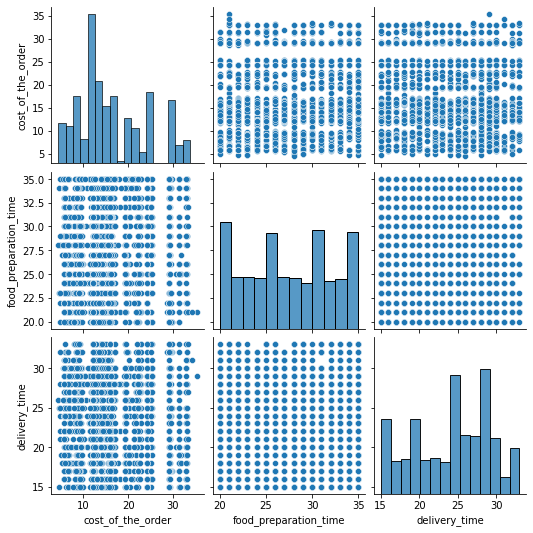

In [30]:
sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

#### Observation
We can tell from the pairplot and the heatmap that there is almost no correlation between any of the Numerical Variables. This would suggest that we will need to check what impact the Categorical Variables may have on the Numerical Variables.

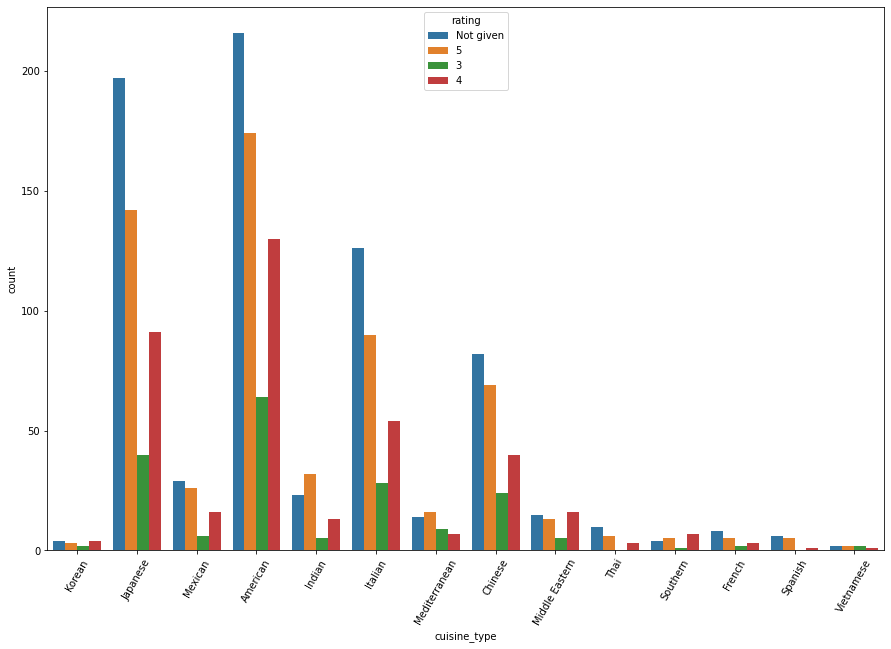

In [31]:
plt.figure(figsize = (15,10))
sns.countplot(data = df, x = "cuisine_type", hue = 'rating')
plt.xticks(rotation = 60)
plt.show()

#### Observation
We can see that from this graph that American, Japanese, Italian and Chinese have the most number of orders. We can also see how that correlates to the number of 5 Ratings that they have received and the number of Not Given ratings.

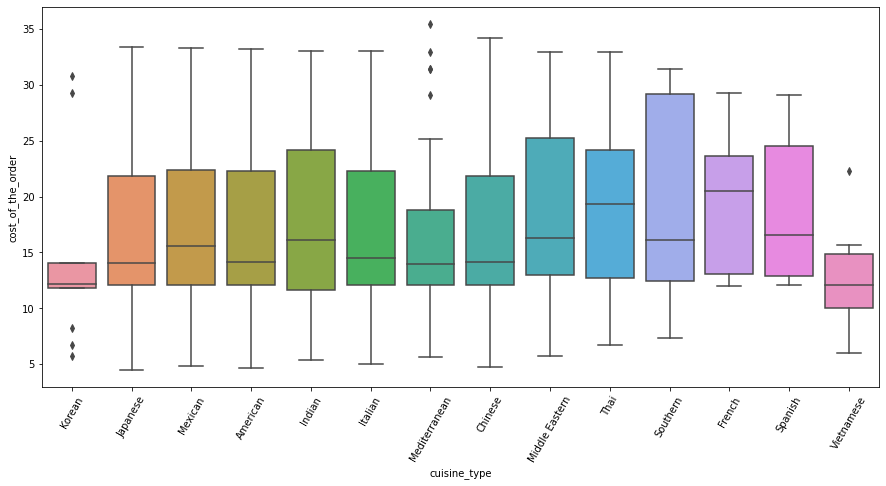

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

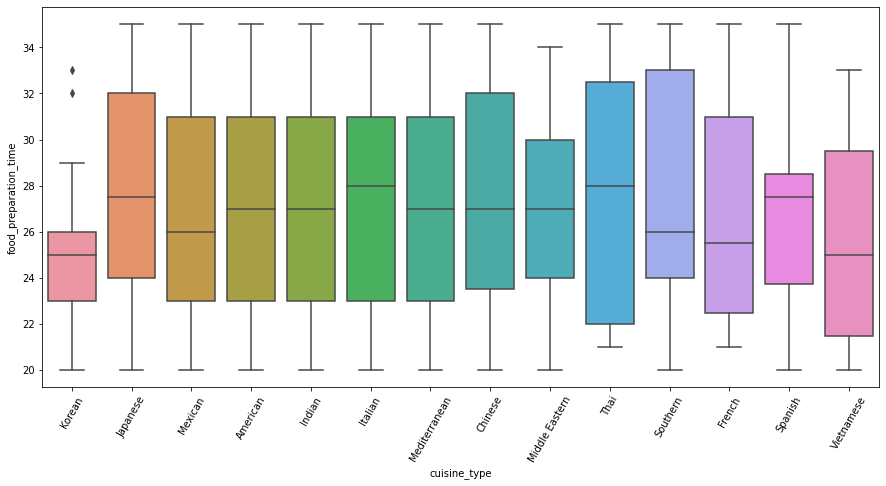

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

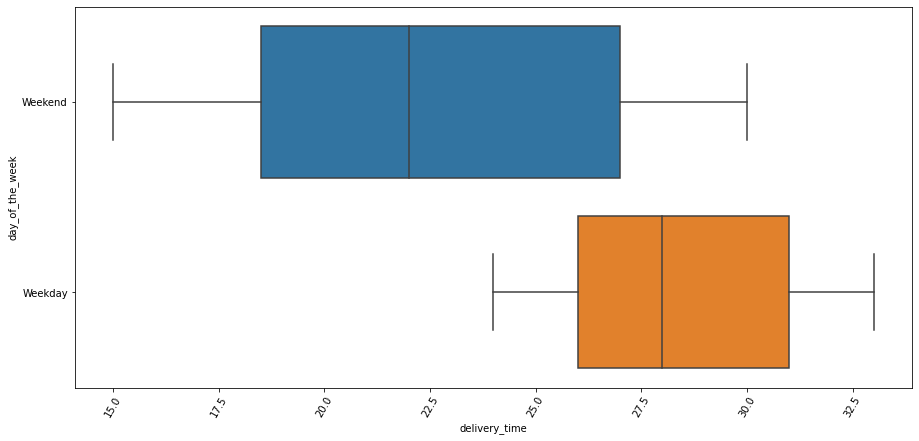

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(y = "day_of_the_week", x = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

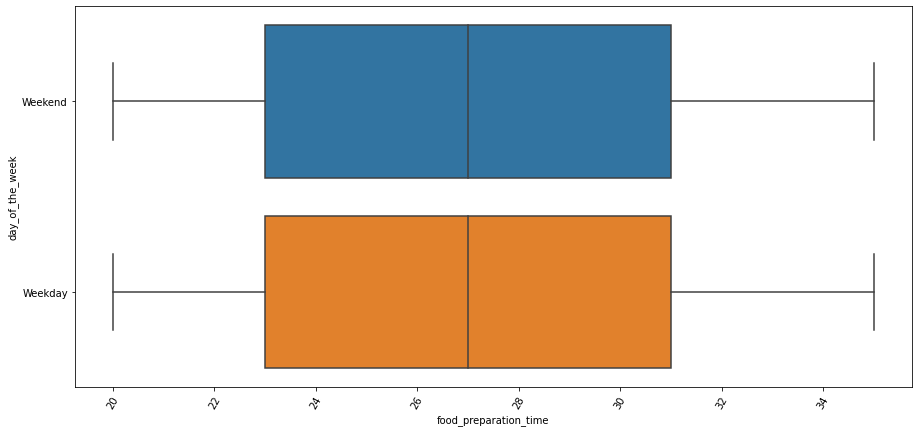

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(y = "day_of_the_week", x = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

In [36]:
df.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending = False)

cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64

In [37]:
df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending = False)

cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

#### Observation
This tells us the sum of the costs of the order against the cuisine type. The second table shows the mean average. And from looking at the 2 tables we can not definitively say whether a certain cuisine will have less orders based on the average cost of the order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
# Write the code here
# rating > 50 and mean rating > 4

df_copy = df.copy() #created a copy of the df so as to not impact the original

df_copy['rating'].replace("Not given", np.nan, inplace = True) #replaced all instances of "Not given" to NaN
df_copy['rating'] = df_copy['rating'].astype(float) #changed the data type to float
# df_copy['rating']

promo_restaurants = df_copy.groupby('restaurant_name').agg({'rating': ['mean', 'sum']}) # Created a table where we can see mean and sum of the rating against the restaurant
promo_restaurants = promo_restaurants[promo_restaurants[('rating', 'sum')] > 50] # Used this to filter the restaurants to see all restaurants with sum of more than 50 rating
promo_restaurants = promo_restaurants[promo_restaurants[('rating', 'mean')] > 4] #Used this to filter out all of the restaurants which have an average rating of 4 or less
promo_restaurants = promo_restaurants.reset_index()
promo_restaurants.columns = ['restaurant_name', 'avg_rating', 'sum_rating'] #Changed the column names to become more readable
promo_restaurants

,restaurant_name,avg_rating,sum_rating
0,Bareburger,4.058824,69.0
1,Blue Ribbon Fried Chicken,4.328125,277.0
2,Blue Ribbon Sushi,4.219178,308.0
3,Blue Ribbon Sushi Bar & Grill,4.590909,101.0
4,Blue Ribbon Sushi Izakaya,4.333333,78.0
5,Cafe Mogador,4.153846,54.0
6,Chipotle Mexican Grill $1.99 Delivery,4.200000,63.0
7,Five Guys Burgers and Fries,4.555556,82.0
8,Han Dynasty,4.434783,102.0
9,J. G. Melon,4.416667,53.0


#### Observations:
Through the code, I could see that all of the restaurants with a rating of more than 50 are also the restaurants with an average rating of higher than 4. However not all restaurants that have an average rating of higher than 4 has a sum of more than 50.

There are a total of 25 restaurants which can get the promotion based on the criterias that have been set

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
# Write the code here
# Using the range(len(df)) to provide the number of times the for loop should iterate. 
#using i as a position in the series and hence saying that for cost in this position in data frame
# if cost is more than 20 or more than 5 apply the percentages on the cost.
for i in range(len(df)):
    cost = df.loc[i, 'cost_of_the_order']
    if cost > 20:
        df.loc[i, 'net_revenue'] = 0.25*cost
    elif cost > 5 and cost <= 20:
        df.loc[i, 'net_revenue'] = 0.15*cost
    else:
        df.loc[i, 'net_revenue'] = 0*cost

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [40]:
net_revenue_generated = df['net_revenue'].sum()
print("The net revenue generated across all orders is " + str(round(net_revenue_generated, 2)))

The net revenue generated across all orders is 6166.3


#### Observations:
The net revenue generated across all orders is 6166.3.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [41]:
# Write the code here
# Created a new variable called total_time
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [42]:
greater_than_60 = df[df["total_time"] > 60]
greater_than_60.shape

percentage = (greater_than_60.shape[0]/df.shape[0]) * 100
percentage

10.537407797681771

#### Observations:
Approximately 10.5 percent of all orders takes more than 60 minutes to be delivered from the the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [43]:
# Write the code here
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time on weekdays:", mean_delivery_time_by_day.loc['Weekday'])
print("Mean delivery time on weekends:", mean_delivery_time_by_day.loc['Weekend'])

Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735


#### Observations:
Mean delivery time is higher on the weekdays, in comparison to the mean delivery time on the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* It takes on average longer on the weekdays for food to be delivered in comparison to the weekends.

* Food Preparation time is dependant on the cuisine.

* There are more orders that are placed on the weekends than they are on the weekdays.

### Recommendations:

* As we can see that there are a lot more orders that are being made for specific cuisine types, the suggestion would be to have a higher proportion of drivers allocated based on the specific cuisines such as American, Japanese, Italian and Chinese respectiveley.

* We can also make sure that there are more drivers available to specific restaurants as well. These could either be the ones with the higher number of orders or with the higher sum rating.

* We should identify why the delivery time on weekdays takes on average 6 minutes longer than on the weekends and figure out if there is any way to reduce the time taken.

---